In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

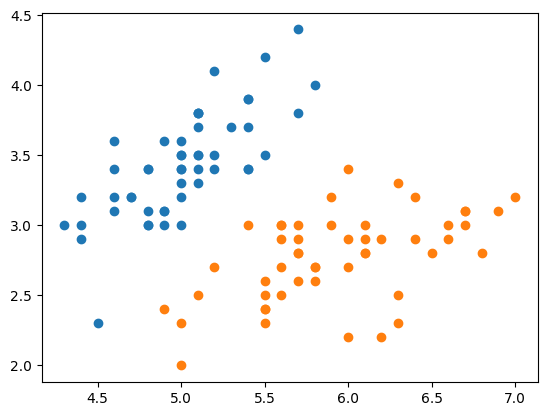

In [12]:
x = iris.data
y = iris.target
# 只做一个简单的二分类
x = x[y<2, :2]
y = y[y<2]

plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()


In [37]:
data_class1 = np.hstack((x[y==0,0].reshape(-1,1),x[y==0,1].reshape(-1,1)))
data_class2 = np.hstack((x[y==1,0].reshape(-1,1),x[y==1,1].reshape(-1,1)))

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3]])

In [47]:
data_class1 = np.hstack((np.ones(data_class1.shape[0]).reshape(-1,1),data_class1)) #增广样本矩阵
data_class2 = np.hstack((np.ones(data_class2.shape[0]).reshape(-1,1),data_class2)) * -1

In [56]:
a = np.ones(data_class1.shape[1])

In [62]:
n_w = 1 #分类错误数量
alpha = 0.0005 #学习率

In [63]:
combined_data = np.concatenate((data_class1, data_class2), axis=0)

# 打乱数据顺序
np.random.shuffle(combined_data)

In [64]:
num = 0 #轮数
while n_w != 0:
    num += 1
    n_w = 0
    site = 0
    for i in combined_data:
        if np.dot(i,a) <= 0:
            n_w += 1
            site -= i
        a += alpha * site
    if num % 10 == 0:
        print(a,np.dot(i,a))

[ 3556274.32498692  3556274.32498692 21087802.17255339  9903632.98702464] 147342328.58717746
[ 3556288.2999869   3556288.2999869  21087884.90005374  9903671.82902475] 147342906.62602952
[ 3556302.27498689  3556302.27498689 21087967.62755409  9903710.67102485] 147343484.66488165
[ 3556316.24998688  3556316.24998688 21088050.35505444  9903749.51302496] 147344062.70373374
[ 3556330.22498686  3556330.22498686 21088133.08255479  9903788.35502506] 147344640.74258584
[ 3556344.19998685  3556344.19998685 21088215.81005514  9903827.19702517] 147345218.78143793
[ 3556358.17498683  3556358.17498683 21088298.53755549  9903866.03902527] 147345796.82029003
[ 3556372.14998682  3556372.14998682 21088381.26505584  9903904.88102538] 147346374.85914212
[ 3556386.1249868   3556386.1249868  21088463.99255618  9903943.72302548] 147346952.89799422
[ 3556400.09998679  3556400.09998679 21088546.72005653  9903982.56502558] 147347530.93684632
[ 3556414.07498678  3556414.07498678 21088629.44755688  9904021.407025

KeyboardInterrupt: 